# <center> Network Descriptive Statistics_II </center>

## 2. Networks from social media platforms<br>
- Large social media platforms are important sources of social networks.
- Social networks play an important in collective action and information diffusion. 
- Here we use the **NETWORKX** to do SNA. https://networkx.org/documentation/stable/reference/introduction.html

### 2.1. Extract retweet and mention networks from Twitter data<br>
* Retweet edgelist 
    - Can be directly obtained from Twitter API as a variable <font color='blue'>"retweeted_status.user.screen_name"</font>. Remeber when we scrape tweepy we can check if this is a retweet or not. 
    - Or can be extracted from the **truncated text** using regular expression.
    - NOTE: Twitter data only contains the original tweet in retweet relations, meaning we can't retrive the retweet chain. 
* Mention edgelist
    - Can be extracted from the **full text** using regular expression.

In [149]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import re
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [150]:
# Fortune 1000 U.S. companies' tweets in 2020/3
# Filtered the keywords list consisitent with this dataset https://github.com/echen102/COVID-19-TweetIDs

df=pd.read_csv('business_tweets.csv',encoding= 'unicode_escape')
df.info()
len(set(df.screen_name))
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5674 entries, 0 to 5673
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         5674 non-null   float64
 1   user_id          5674 non-null   object 
 2   screen_name      5674 non-null   object 
 3   created_at       5674 non-null   object 
 4   favorite_count   5674 non-null   int64  
 5   retweet_count    5674 non-null   int64  
 6   text             5674 non-null   object 
 7   truncated_tweet  5658 non-null   object 
 8   retweet          5658 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 399.1+ KB


558

,tweet_id,user_id,screen_name,created_at,favorite_count,retweet_count,text,truncated_tweet,retweet
0,1.230000e+18,2904112697,MMC_Global,3/1/20 20:00,3,1,How will the #coronavirus impact #business and...,How will the #coronavirus impact #business and...,original
1,1.230000e+18,120578352,CatalentPharma,3/1/20 21:50,1,2,Join us at Gene Therapy for Rare Disorders in ...,Join us at Gene Therapy for Rare Disorders in ...,original
2,1.230000e+18,151998296,MoodysInvSvc,3/2/20 9:53,1,1,The #coronavirus outbreak will disrupt automot...,The #coronavirus outbreak will disrupt automot...,original
3,1.230000e+18,337847812,FTI_Global,3/2/20 10:00,1,1,Read why John Beck thinks central banks will ¡...,Read why John Beck thinks central banks will ¡...,original
4,1.230000e+18,2904112697,MMC_Global,3/2/20 11:00,6,1,To effectively prepare and respond to the thre...,To effectively prepare and respond to the thre...,original


In [119]:
# subset retweets
rt_df=df[df.retweet=="retweet"]
rt_df.head()


,tweet_id,user_id,screen_name,created_at,favorite_count,retweet_count,text,truncated_tweet,retweet
5,1.230000e+18,48402711,unisyscorp,3/2/20 11:31,0,1,"Niranjan Navaratnarajah MBA, Cargo Industry Di...",RT @SurecomMedia09: Niranjan Navaratnarajah MB...,retweet
7,1.230000e+18,15749983,Cisco,3/2/20 14:15,0,218,Due to the unprecedented and global increase i...,RT @CiscoCollab: Due to the unprecedented and ...,retweet
8,1.230000e+18,2904112697,MMC_Global,3/2/20 14:29,0,3,#Webcast replay now available: Learn how to pr...,RT @MarshGlobal: #Webcast replay now available...,retweet
9,1.230000e+18,2904112697,MMC_Global,3/2/20 14:30,0,1,How will the #coronavirus impact #business and...,RT @GuyCarpenter: How will the #coronavirus im...,retweet
14,1.230000e+18,48402711,unisyscorp,3/2/20 16:28,0,1,A wrap up of @RSAConference #2020: from #Coron...,RT @InformationAge: A wrap up of @RSAConferenc...,retweet


In [151]:
# extract retweeted accounts 
twitter_username_re = re.compile(r'RT @([A-Za-z0-9_]+)')
# search in truncated text
# you can also retrieve the retweeted accounts directly from API
retweeted=[re.findall(twitter_username_re,x)[0].lower() for x in rt_df.truncated_tweet]
rt_df=rt_df.copy()
rt_df["retweeted"]=retweeted
rt_df.head()

,tweet_id,user_id,screen_name,created_at,favorite_count,retweet_count,text,truncated_tweet,retweet,retweeted
5,1.230000e+18,48402711,unisyscorp,3/2/20 11:31,0,1,"Niranjan Navaratnarajah MBA, Cargo Industry Di...",RT @SurecomMedia09: Niranjan Navaratnarajah MB...,retweet,surecommedia09
7,1.230000e+18,15749983,Cisco,3/2/20 14:15,0,218,Due to the unprecedented and global increase i...,RT @CiscoCollab: Due to the unprecedented and ...,retweet,ciscocollab
8,1.230000e+18,2904112697,MMC_Global,3/2/20 14:29,0,3,#Webcast replay now available: Learn how to pr...,RT @MarshGlobal: #Webcast replay now available...,retweet,marshglobal
9,1.230000e+18,2904112697,MMC_Global,3/2/20 14:30,0,1,How will the #coronavirus impact #business and...,RT @GuyCarpenter: How will the #coronavirus im...,retweet,guycarpenter
14,1.230000e+18,48402711,unisyscorp,3/2/20 16:28,0,1,A wrap up of @RSAConference #2020: from #Coron...,RT @InformationAge: A wrap up of @RSAConferenc...,retweet,informationage


In [152]:
# read in covariates info, which will be the sample of organizations that we focus on.
# this file is about types of organizations
# large NGOs, government organizations
cov=pd.read_csv('covariates.csv',encoding= 'unicode_escape')
cov.head()

,state,screen_name,type
0,AR,clintonfdn,ngo
1,AZ,stmarysfoodbank,ngo
2,AZ,magellanhealth,business
3,CA,atvi_ab,business
4,CA,vmcfoundation,ngo


In [154]:
# we filter retweeted accounts and find those we focus on
# then we will get an edgelist of companies 
# if you want to see everyone those companies retweeted, then you need to code those accounts.

rt_el=rt_df[rt_df.retweeted.isin(cov.screen_name)] 
rt_el=rt_el.iloc[:,[2,9]]
rt_el.screen_name=[x.lower() for x in rt_el.screen_name]
len(rt_el)
rt_el

98

,screen_name,retweeted
42,molinahealth,wadepthealth
427,dte_energy,energy
449,dte_energy,epa
458,unitedhealthgrp,cdcgov
559,zionsbank,sbagov
...,...,...
5380,ugi_utilities,pahealthdept
5381,ugi_utilities,pahealthdept
5455,kelloggcompany,feedingamerica
5493,microsoft,cdcfound


In [155]:
# Let's build a network!

# Create empty DIRECTED graph
G = nx.DiGraph()

# Add edges 
G.add_edges_from(rt_el.to_numpy().tolist())


<Figure size 1200x1000 with 0 Axes>

Text(0.5, 1.0, 'The retweet network of Fortune companies')

(-0.898775493916383,
 1.1804266306436382,
 -0.8577917278645707,
 1.0067648367954682)

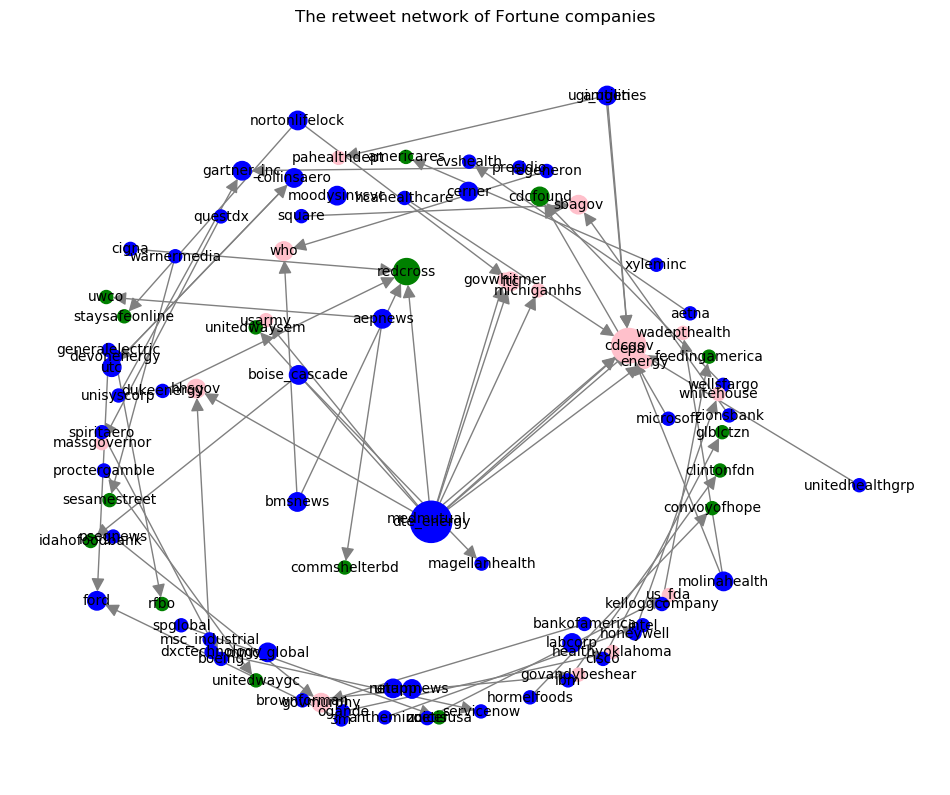

In [158]:
# Take a look
figure(figsize=(12, 10), dpi=100)

# node size proportional to degree
node_size= [x * 8000 for x in nx.degree_centrality(G).values()]

# choose a layout function
pos=nx.kamada_kawai_layout(G)


# edge color
edge_color="grey"

# make arrows more obvious
arrowsize=20

# make a list of colors to differentiate different types of orgs
color=[cov.loc[cov.screen_name==i, "type"].iloc[0] for i in G.nodes]
replacements = {
    "business": "blue",
    "ngo": "green",
    "gov": "pink",
}
node_color = [replacements.get(x, x) for x in color]


nx.drawing.nx_pylab.draw_networkx(G,node_size=node_size, 
                                  pos=pos,
                                  node_color=node_color,
                                  arrowsize=arrowsize,
                                  edge_color=edge_color,
                                  with_labels=True,
                                  font_size=10)
plt.title('The retweet network of Fortune companies')
plt.axis("off") 
plt.show()

# what interpretations can you draw from the graph?

In [125]:
# Which companies sent more ties?
x=nx.out_degree_centrality(G)
{k: v for k, v in sorted(x.items(), key=lambda item: item[1],reverse=True)}

{'dte_energy': 0.1098901098901099,
 'molinahealth': 0.02197802197802198,
 'ugi_utilities': 0.02197802197802198,
 'nortonlifelock': 0.02197802197802198,
 'aepnews': 0.02197802197802198,
 'boise_cascade': 0.02197802197802198,
 'bmsnews': 0.02197802197802198,
 'unitedhealthgrp': 0.01098901098901099,
 'zionsbank': 0.01098901098901099,
 'amgen': 0.01098901098901099,
 'wellsfargo': 0.01098901098901099,
 'aetna': 0.01098901098901099,
 'xyleminc': 0.01098901098901099,
 'cerner': 0.01098901098901099,
 'regeneron': 0.01098901098901099,
 'hcahealthcare': 0.01098901098901099,
 'presidio': 0.01098901098901099,
 'moodysinvsvc': 0.01098901098901099,
 'square': 0.01098901098901099,
 'cigna': 0.01098901098901099,
 'collinsaero': 0.01098901098901099,
 'utc': 0.01098901098901099,
 'questdx': 0.01098901098901099,
 'unisyscorp': 0.01098901098901099,
 'warnermedia': 0.01098901098901099,
 'dukeenergy': 0.01098901098901099,
 'devonenergy': 0.01098901098901099,
 'generalelectric': 0.01098901098901099,
 'spirit

In [159]:
# Which organizations have the largest indegree centrality?
x=nx.in_degree_centrality(G)
{k: v for k, v in sorted(x.items(), key=lambda item: item[1],reverse=True)}

{'cdcgov': 0.07692307692307693,
 'redcross': 0.04395604395604396,
 'sbagov': 0.02197802197802198,
 'cdcfound': 0.02197802197802198,
 'who': 0.02197802197802198,
 'ftc': 0.02197802197802198,
 'gartner_inc': 0.02197802197802198,
 'hhsgov': 0.02197802197802198,
 'ford': 0.02197802197802198,
 'govmurphy': 0.02197802197802198,
 'wadepthealth': 0.01098901098901099,
 'energy': 0.01098901098901099,
 'epa': 0.01098901098901099,
 'michiganhhs': 0.01098901098901099,
 'cvshealth': 0.01098901098901099,
 'govwhitmer': 0.01098901098901099,
 'americares': 0.01098901098901099,
 'pahealthdept': 0.01098901098901099,
 'cerner': 0.01098901098901099,
 'moodysinvsvc': 0.01098901098901099,
 'staysafeonline': 0.01098901098901099,
 'uwco': 0.01098901098901099,
 'collinsaero': 0.01098901098901099,
 'utc': 0.01098901098901099,
 'usarmy': 0.01098901098901099,
 'unitedwaysem': 0.01098901098901099,
 'massgovernor': 0.01098901098901099,
 'sesamestreet': 0.01098901098901099,
 'idahofoodbank': 0.01098901098901099,
 'rf

In [160]:
# Can you propose any research question?

# Eg: Which type of organizations are more likely to be retweeted from business?
cent=pd.DataFrame(x.items(),columns=['screen_name', 'indegree']) 
cent=pd.merge(cent, cov, on='screen_name',how="left")
cent.head()

# can test with a simple regression
import statsmodels.formula.api as smf
model = smf.ols(formula = 'indegree ~  C(type)+C(state)', \
                   data = cent).fit();
model.summary()

# NOTE!!! A more valid way to test if the effects of covariates on receiving and sending ties
# Should be Exponential Random Graph Models. 

,screen_name,indegree,state,type
0,molinahealth,0.000000,CA,business
1,wadepthealth,0.010989,WA,gov
2,dte_energy,0.000000,MI,business
3,energy,0.010989,national,gov
4,epa,0.010989,national,gov


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               indegree   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     1.807
Date:                Sat, 02 Oct 2021   Prob (F-statistic):             0.0254
Time:                        19:00:52   Log-Likelihood:                 315.41
No. Observations:                  92   AIC:                            -568.8
Df Residuals:                      61   BIC:                            -490.7
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0035      0.010      0.344      0.732      -0.017       0.024
C(type)[T.gov]           0.0109      0.004      2.522      0.014       0.002       0.019
C(type)[T.ngo]           0.0074      0.004      2.041      0.046       0.000       0.015
C(state)[T.AZ]           0.0074      0.014      0.528      0.600      -0.021       0.036
C(state)[T.CA]           0.0001      0.011      0.011      0.991      -0.021       0.022
C(state)[T.CT]           0.0038      0.011      0.343      0.733      -0.018       0.026
C(state)[T.DC]           0.0165      0.012      1.396      0.168      -0.007       0.040
C(state)[T.GA]           0.0110      0.014      0.806      0.423      -0.016       0.038
C(state)[T.IA]           0.0074      0.014      0.528      0.600      -0.021       0.036
C(state)[T.ID]          -0.0018      0.012     -0.148      0.883      -0.026       0.022
C(state)[T.IL]           0.0037      0.012      0.312      0.756      -0.020       0.028
C(state)[T.IN]          -0.0035      0.014     -0.251      0.803      -0.032       0.025
C(state)[T.KS]          -0.0035      0.014     -0.251      0.803      -0.032       0.025
C(state)[T.KY]          -0.0035      0.012     -0.279      0.781      -0.028       0.021
C(state)[T.MA]          -0.0035      0.012     -0.279      0.781      -0.028       0.021
C(state)[T.MI]           0.0008      0.011      0.069      0.945      -0.021       0.023
C(state)[T.MN]          -0.0035      0.012     -0.302      0.763      -0.027       0.020
C(state)[T.MO]           0.0037      0.012      0.312      0.756      -0.020       0.028
C(state)[T.NC]           0.0001      0.012      0.010      0.992      -0.023       0.024
C(state)[T.NJ]          -0.0013      0.011     -0.118      0.906      -0.024       0.021
C(state)[T.NY]          -0.0011      0.010     -0.107      0.915      -0.022       0.020
C(state)[T.OH]          -0.0018      0.011     -0.168      0.867      -0.023       0.019
C(state)[T.OK]          -0.0026      0.011     -0.236      0.814      -0.025       0.020
C(state)[T.PA]          -0.0035      0.012     -0.298      0.767      -0.027       0.020
C(state)[T.RI]           0.0074      0.014      0.528      0.600      -0.021       0.036
C(state)[T.TN]           0.0020      0.012      0.158      0.875      -0.023       0.027
C(state)[T.UN]        4.452e-17      0.014   3.27e-15      1.000      -0.027       0.027
C(state)[T.UT]          -0.0035      0.014     -0.251      0.803      -0.032       0.025
C(state)[T.VA]          -0.0035      0.014     -0.251      0.803      -0.032       0.025
C(state)[T.WA]          -0.0035      0.012     -0.279      0.781      -0.028       0.021
C(state)[T.national]     0.0076      0.011      0.661      0.511      -0.015       0.030
=========================================================

In [144]:
# Now let's turn to mention network
# Note: in one tweet, there could be multiple mentioned accounts
# How to convert it to an edgelist?

men_df=df[df.retweet!="retweet"]
men_df.head()

# extract mentioned accounts 
twitter_username_men = re.compile(r'@([A-Za-z0-9_]+)')
# search in full text
mentioned=[re.findall(twitter_username_men,x) for x in men_df.text]
men_df=men_df.copy()
men_df['mentioned']=np.array(mentioned,dtype="object")
men_df=men_df.iloc[:,[2,9]]
men_df.head()

,tweet_id,user_id,screen_name,created_at,favorite_count,retweet_count,text,truncated_tweet,retweet
0,1.230000e+18,2904112697,MMC_Global,3/1/20 20:00,3,1,How will the #coronavirus impact #business and...,How will the #coronavirus impact #business and...,original
1,1.230000e+18,120578352,CatalentPharma,3/1/20 21:50,1,2,Join us at Gene Therapy for Rare Disorders in ...,Join us at Gene Therapy for Rare Disorders in ...,original
2,1.230000e+18,151998296,MoodysInvSvc,3/2/20 9:53,1,1,The #coronavirus outbreak will disrupt automot...,The #coronavirus outbreak will disrupt automot...,original
3,1.230000e+18,337847812,FTI_Global,3/2/20 10:00,1,1,Read why John Beck thinks central banks will ¡...,Read why John Beck thinks central banks will ¡...,original
4,1.230000e+18,2904112697,MMC_Global,3/2/20 11:00,6,1,To effectively prepare and respond to the thre...,To effectively prepare and respond to the thre...,original


,screen_name,mentioned
0,MMC_Global,"[MMC_Global, BRINKNewsNow]"
1,CatalentPharma,[]
2,MoodysInvSvc,[]
3,FTI_Global,[]
4,MMC_Global,[MarshGlobal]


In [161]:
# 1. Split the list of accounts mentioned
# 2. Check if each account is within our sample
# 3. Make the edgelist

men_el=[]
for i in men_df.index:
    if len(men_df.mentioned[i])!=0:          
        for k in men_df.mentioned[i]:   
            line=[None]*2
            if k.lower() in list(cov.screen_name):   
                line[0]=men_df.screen_name[i].lower()
                line[1]=k.lower()
                line
                men_el.append(line)
                    

['mmc_global', 'mmc_global']

['hwnelectric', 'dhsgov']

['dte_energy', 'cdcgov']

['aetna', 'cvshealth']

['aetna', 'cdcgov']

['aetna', 'who']

['nasdaq', 'nasdaq']

['mmc_global', 'mmc_global']

['henryschein', 'who']

['uhs_inc', 'cdcgov']

['cloroxco', 'cdcgov']

['cloroxco', 'who']

['pfizer', 'whitehouse']

['aetna', 'cvshealth']

['3m', 'vp']

['3m', 'govtimwalz']

['3m', 'us_fda']

['pfizer', 'cdcgov']

['digitalrealty', 'who']

['prologis', 'prologis']

['hcahealthcare', 'cdcgov']

['uhs_inc', 'cdcgov']

['spglobal', 'qualcomm']

['cummins', 'cummins']

['mmc_global', 'mmc_global']

['dte_energy', 'cdcgov']

['prologis', 'prologis']

['cigna', 'cdcgov']

['cigna', 'cdcgov']

['envisionleads', 'cdcgov']

['firstrepublic', 'chcfnews']

['spglobal', 'goldmansachs']

['spglobal', 'cmegroup']

['pfizer', 'who']

['uhs_inc', 'cdcgov']

['dte_energy', 'cdcgov']

['mmc_global', 'mmc_global']

['genworth', 'cdcgov']

['facebook', 'who']

['facebook', 'cdcgov']

['resmed', 'who']

['sysco', 'who']

['sysco', 'cdcgov']

['amfam', 'amfam']

['thermofisher', 'us_fda']

['thermofisher', 'us_fda']

['riteaid', 'cdcgov']

['bdandco', 'whitehouse']

['mmc_global', 'mmc_global']

['nasdaq', 'nasdaq']

['dte_energy', 'cdcgov']

['dominionenergy', 'redcross']

['sysco', 'who']

['molinahealth', 'cdcgov']

['hologic', 'us_fda']

['servicenow', 'wadepthealth']

['mmc_global', 'who']

['amwater', 'govholcomb']

['exxonmobil', 'who']

['exxonmobil', 'cdcgov']

['mmc_global', 'mmc_global']

['fmccorp', 'cdcgov']

['humana', 'feedingamerica']

['goodyeartireco', 'acrfoodbank']

['zionsbank', 'chase']

['zionsbank', 'bankofamerica']

['zionsbank', 'wellsfargo']

['fmccorp', 'cdcgov']

['edisonintl', 'gavinnewsom']

['healthcare_abc', 'directrelief']

['prologis', 'prologis']

['molinahealth', 'cdcgov']

['nasdaq', 'nasdaq']

['dte_energy', 'cdcgov']

['spglobal', 'energy']

['digitalrealty', 'nvidia']

['exelon', 'exelon']

['exelon', 'exelon']

['hcahealthcare', 'cdcgov']

['kbrincorporated', 'cdcgov']

['kbrincorporated', 'who']

['lillypad', 'statehealthin']

['spiritaero', 'spiritaero']

['exelon', 'redcross']

['exelon', 'exelon']

['spglobal', 'ford']

['spglobal', 'gm']

['comcast', 'cdcgov']

['discoveryinctv', 'discoveryinctv']

['underarmour', 'feedingamerica']

['cvshealth', 'cvshealth']

['comericabank', 'sbagov']

['morganstanley', 'feedingamerica']

['morganstanley', 'cdcfound']

['morganstanley', 'who']

['itroninc', 'itroninc']

['citi', 'who']

['aepnews', 'ftc']

['hwnelectric', 'hwnelectric']

['hwnelectric', 'hwnelectric']

['cummins', 'cummins']

['prologis', 'prologis']

['spiritairlines', 'who']

['spiritairlines', 'cdcgov']

['mmc_global', 'mmc_global']

['dte_energy', 'cdcgov']

['chemours', 'who']

['cigna', 'cdcgov']

['dte_energy', 'redcross']

['proctergamble', 'fifththird']

['proctergamble', 'unitedwaygc']

['mmc_global', 'mmc_global']

['dte_energy', 'redcross']

['uhs_inc', 'cdcgov']

['amwater', 'feedingamerica']

['sysco', 'feedingamerica']

['proctergamble', 'directrelief']

['sanderson_corp', 'usda']

['hwnelectric', 'hwnelectric']

['lockheedmartin', 'deptofdefense']

['travelers', 'cdcgov']

['mmc_global', 'who']

['labcorp', 'microsoft']

['mmc_global', 'mmc_global']

['securian', '2harvest']

['nblenergy', 'cdcgov']

['nblenergy', 'who']

['weareschneider', 'mayoclinic']

['univision', 'univision']

['hwnelectric', 'hwnelectric']

['univision', 'univision']

['univision', 'univision']

['mmc_global', 'mmc_global']

['comcast', 'cdcgov']

['hwnelectric', 'hwnelectric']

['uhs_inc', 'cdcgov']

['cvshealth', 'aetna']

['spglobal', 'amazon']

['cigna', 'who']

['zebratechnology', 'redcross']

['portlandgeneral', 'oregonfoodbank']

['hpe', 'whostp']

['prudential', 'prudential']

['prudential', 'govmurphy']

['discoveryinctv', 'nokidhungry']

['itroninc', 'itroninc']

['brookdaleliving', 'who']

['mmc_global', 'mmc_global']

['spglobal', 'epa']

['uhs_inc', 'governortomwolf']

['uhs_inc', 'cdcgov']

['uhs_inc', 'pahealthdept']

['abbvie', 'feedingamerica']

['westerndigital', 'vmcfoundation']

['hwnelectric', 'hwnelectric']

['albertsonscos', 'mgmresortsintl']

['ford', '3m']

['mmc_global', 'mmc_global']

['fmccorp', 'who']

['generalelectric', 'ford']

['merck', 'cdcgov']

['iqvia_global', 'questdx']

['presidio', 'presidio']

['spglobal', 'boeing']

['itroninc', 'itroninc']

['bdandco', 'directrelief']

['bdandco', 'who']

['bdandco', 'americares']

['bdandco', 'imc_worldwide']

['bdandco', 'projecthopeorg']

['bdandco', 'cdcfound']

['bdandco', 'redcross']

['teradata', 'ford']

['teradata', '3m']

['perkinelmer', 'us_fda']

['3m', 'ford']

['berryglobalinc', 'dhsgov']

['mmc_global', 'mmc_global']

['mmc_global', 'mmc_global']

['fmccorp', 'cdcgov']

['cvshealth', 'aetna']

['stifel', 'stifel']

['ballcorphq', 'redcross']

['resmed', 'nygovcuomo']

['nasdaq', 'nasdaq']

['mercuryins', 'att']

['mercuryins', 'wearefarmers']

['mmc_global', 'mmc_global']

['servicenow', 'dxctechnology']

['chemours', 'nscsafety']

['travelers', 'cdcgov']

['americanexpress', 'feedingamerica']

['sysco', 'cdcgov']

['sysco', 'who']

['zionsbank', 'fdicgov']

['thermofisher', 'us_fda']

['statestreet', 'who']

['statestreet', 'cdcfound']

['prologis', 'prologis']

['equinix', 'netflix']

['netapp', 'nvidia']

['spglobal', 'nike']

['exelon', 'exelon']

['msc_industrial', 'asspsafety']

['intel', 'antheminc']

['admupdates', 'who']

['marathonpetroco', 'govmikedewine']

['intlpaperco', 'who']

['intlpaperco', 'cdcgov']

['equinix', 'netflix']

['equinix', 'equinix']

['uhs_inc', 'cdcgov']

['resmed', 'nygovcuomo']

['prudential', 'prudential']

['kccorp', 'unitedway']

['fmccorp', 'pennmedicine']

['proctergamble', 'feedingamerica']

['corning', 'nygovcuomo']

['abbvie', 'imc_worldwide']

['abbvie', 'feedingamerica']

['abbvie', 'directrelief']

['davita', 'cmsgov']

['mmc_global', 'mmc_global']

['nasdaq', 'who']

['goldmansachs', 'coach']

['proctergamble', 'who']

['comcast', 'cdcgov']

['proctergamble', 'who']

['nationwide', 'govmikedewine']

['nationwide', 'ohdeptofhealth']

['proctergamble', 'who']

['proctergamble', 'who']

['proctergamble', 'who']

['proctergamble', 'who']

['proctergamble', 'who']

['proctergamble', 'who']

['proctergamble', 'm25m_org']

['proctergamble', 'm25m_org']

['proctergamble', 'm25m_org']

['atvi_ab', 'who']

['inglesadvantage', 'starbucks']

['proctergamble', 'who']

['proctergamble', 'who']

['proctergamble', 'who']

['equinix', 'netflix']

['manpowergroup', 'manpowergroup']

['atlasairww', 'fema']

['xcelenergyctr', 'feedingamerica']

['proctergamble', 'feedingamerica']

['proctergamble', 'feedingamerica']

['proctergamble', 'feedingamerica']

['prudential', 'prudential']

['nisourceinc', 'redcross']

['prologis', 'prologis']

['mmc_global', 'mmc_global']

['prahsciences', 'who']

['guardianlife', 'feedingamerica']

['spglobal', 'spglobal']

['granite', 'redcross']

['molinahealth', 'govmikedewine']

['magellanhealth', 'stmarysfoodbank']

['pitneybowes', 'pitneybowes']

['chsinc', 'unitedwaytc']

['generalelectric', 'ford']

['pvhcorp', 'who']

['labcorp', 'labcorp']

['unisyscorp', 'unisyscorp']

['atlasairww', 'fema']

['hanesbrands', 'redcross']

['entergy', 'cdcgov']

['firstenergycorp', 'unitedway']

['equinix', 'equinix']

['equinix', 'netflix']

['spglobal', 'usda']

['spglobal', 'spglobal']

In [162]:
# Create empty DIRECTED graph
G = nx.DiGraph()

# Add edges 
G.add_edges_from(men_el)

<Figure size 1200x1000 with 0 Axes>

Text(0.5, 1.0, 'The mention network of Fortune companies')

(-1.1985657899907711,
 1.0896685518076408,
 -0.9672887506300664,
 0.9171791360468977)

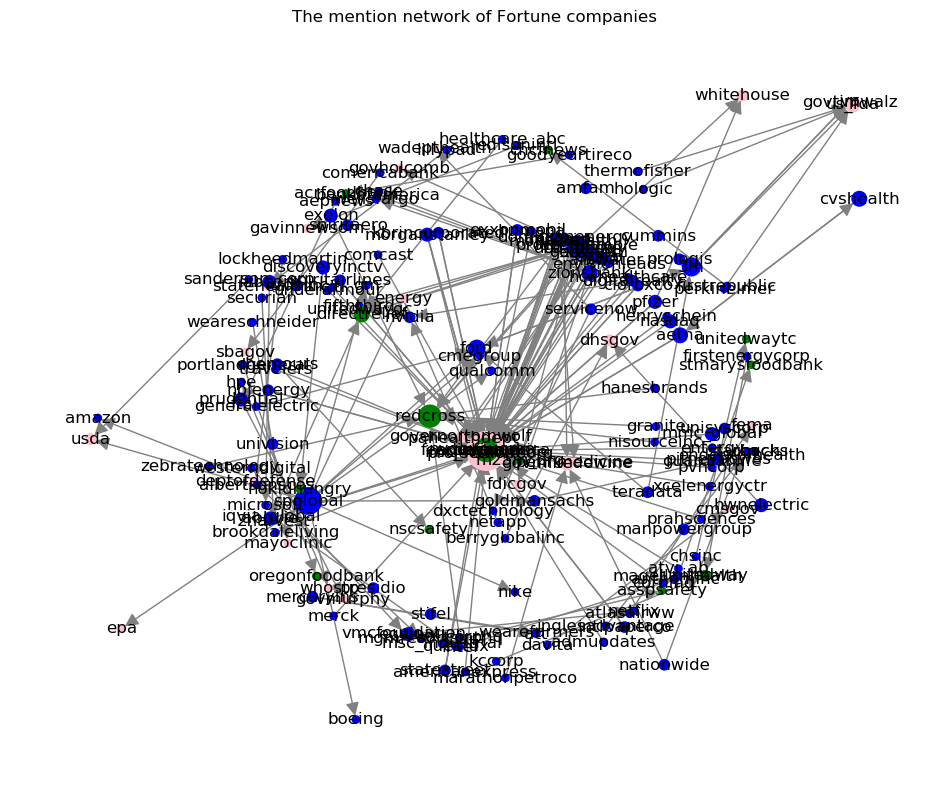

In [163]:
# Take a look
figure(figsize=(12, 10), dpi=100)

# node size proportional to degree
node_size= [x * 5000 for x in nx.degree_centrality(G).values()]

# choose a layout function
pos=nx.kamada_kawai_layout(G)

# edge color
edge_color="grey"

# make arrows more obvious
arrowsize=20

# make a list of colors 
color=[cov.loc[cov.screen_name==i, "type"].iloc[0] for i in G.nodes]
replacements = {
    "business": "blue",
    "ngo": "green",
    "gov": "pink",
}
node_color = [replacements.get(x, x) for x in color]


nx.drawing.nx_pylab.draw_networkx(G,node_size=node_size, 
                                  pos=pos,
                                  node_color=node_color,
                                  arrowsize=arrowsize,
                                  edge_color=edge_color,
                                  with_labels=True)
plt.title('The mention network of Fortune companies')
plt.axis("off") 
plt.show()

# What differences can you see between the retweet and mention networks?

In [164]:
# Which organization has the largest indegree centrality in the mention network?
x=nx.in_degree_centrality(G)

cent=pd.DataFrame(x.items(),columns=['screen_name', 'indegree']) 
cent=pd.merge(cent, cov, on='screen_name',how="left")
len(cent)

# can test with a simple regression
import statsmodels.formula.api as smf
model = smf.ols(formula = 'indegree ~  C(type)+C(state)', \
                   data = cent).fit();
model.summary()

182

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               indegree   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.9314
Date:                Sat, 02 Oct 2021   Prob (F-statistic):              0.586
Time:                        19:06:30   Log-Likelihood:                 516.14
No. Observations:                 182   AIC:                            -956.3
Df Residuals:                     144   BIC:                            -834.5
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0012      0.012     -0.103      0.918      -0.024       0.022
C(type)[T.gov]           0.0054      0.005      1.008      0.315      -0.005       0.016
C(type)[T.ngo]           0.0079      0.005      1.722      0.087      -0.001       0.017
C(state)[T.CA]           0.0033      0.012      0.279      0.780      -0.020       0.027
C(state)[T.CO]           0.0012      0.016      0.074      0.941      -0.031       0.033
C(state)[T.CT]           0.0034      0.014      0.242      0.809      -0.024       0.031
C(state)[T.DC]           0.0209      0.016      1.297      0.197      -0.011       0.053
C(state)[T.DE]           0.0012      0.020      0.060      0.952      -0.038       0.040
C(state)[T.FL]           0.0012      0.020      0.060      0.952      -0.038       0.040
C(state)[T.GA]           0.0099      0.020      0.501      0.617      -0.029       0.049
C(state)[T.HI]           0.0067      0.020      0.341      0.734      -0.032       0.046
C(state)[T.ID]           0.0012      0.020      0.060      0.952      -0.038       0.040
C(state)[T.IL]           0.0078      0.012      0.621      0.536      -0.017       0.032
C(state)[T.IN]           0.0028      0.013      0.215      0.830      -0.023       0.029
C(state)[T.KS]           0.0067      0.020      0.341      0.734      -0.032       0.046
C(state)[T.KY]           0.0012      0.020      0.060      0.952      -0.038       0.040
C(state)[T.LA]           0.0012      0.020      0.060      0.952      -0.038       0.040
C(state)[T.MA]           0.0012      0.014      0.088      0.930      -0.026       0.028
C(state)[T.MD]           0.0030      0.015      0.205      0.838      -0.026       0.032
C(state)[T.MI]           0.0104      0.015      0.705      0.482      -0.019       0.040
C(state)[T.MN]           0.0021      0.013      0.164      0.870      -0.023       0.028
C(state)[T.MO]           0.0067      0.020      0.341      0.734      -0.032       0.046
C(state)[T.MS]           0.0012      0.020      0.060      0.952      -0.038       0.040
C(state)[T.NC]           0.0030      0.013      0.229      0.819      -0.023       0.029
C(state)[T.NJ]           0.0031      0.013      0.230      0.818      -0.023       0.029
C(state)[T.NV]           0.0067      0.020      0.341      0.734      -0.032       0.046
C(state)[T.NY]           0.0037      0.012      0.305      0.761      -0.020       0.028
C(state)[T.OH]           0.0020      0.012      0.163      0.871      -0.022       0.026
C(state)[T.OR]           0.0022      0.015      0.153      0.878      -0.027       0.031
C(state)[T.PA]           0.0019      0.013      0.149      0.882      -0.024       0.027
C(state)[T.RI]           0.0122      0.020      0.622      0.535      -0.027       0.051
C(state)[T.TN]           0.0012      0.014      0.085    